In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]


In [6]:
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


## Train test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=121)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [9]:
X_train

,Age,EstimatedSalary
102,32,86000
201,49,74000
167,35,71000
371,60,83000
151,41,45000
...,...,...
180,26,16000
65,24,58000
95,35,44000
264,48,90000


In [11]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.785714,69107.142857
std,10.609244,32961.734397
min,18.000000,15000.000000
25%,29.000000,44000.000000
50%,37.000000,67000.000000
75%,46.000000,86000.000000
max,60.000000,150000.000000


In [10]:
X_test

,Age,EstimatedSalary
215,60,108000
200,35,39000
268,47,144000
143,30,89000
37,30,49000
...,...,...
357,41,72000
56,23,48000
395,46,41000
253,37,146000


In [12]:
X_test.describe()

,Age,EstimatedSalary
count,120.000000,120.000000
mean,37.350000,71225.000000
std,10.219153,36710.876391
min,18.000000,15000.000000
25%,30.000000,41000.000000
50%,36.000000,71500.000000
75%,46.000000,89000.000000
max,60.000000,148000.000000


# StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
scaler.mean_

array([3.77857143e+01, 6.91071429e+04])

In [15]:
X_train_scaled

array([[-0.54632295,  0.51341667],
       [ 1.05892225,  0.14870631],
       [-0.26304438,  0.05752872],
       [ 2.09761032,  0.42223908],
       [ 0.30351275, -0.73267707],
       [ 1.34220082,  2.09382825],
       [ 1.43662701, -1.0669949 ],
       [ 1.34220082, -1.4620978 ],
       [ 1.90875795,  0.78694945],
       [ 0.96449606,  1.51637017],
       [-0.45189676, -1.15817249],
       [-0.35747057,  0.08792125],
       [ 1.05892225, -1.00620984],
       [-1.20730626,  0.33106149],
       [-0.82960151,  0.17909884],
       [ 0.02023418, -0.12482646],
       [-0.26304438,  1.18205234],
       [ 1.90875795, -0.67189201],
       [ 0.96449606,  0.81734198],
       [ 0.77564369, -1.12777996],
       [-1.01845389,  0.81734198],
       [-0.45189676, -0.00325634],
       [ 2.09761032, -0.82385466],
       [ 0.39793894, -0.4591443 ],
       [ 1.43662701,  0.39184655],
       [-0.26304438, -0.27678912],
       [ 0.11466037,  0.2398839 ],
       [ 0.96449606,  1.97225813],
       [-0.73517532,

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [18]:
X_test_scaled

,Age,EstimatedSalary
0,2.097610,1.182052
1,-0.263044,-0.915032
2,0.870070,2.276183
3,-0.735175,0.604594
4,-0.735175,-0.611107
...,...,...
115,0.303513,0.087921
116,-1.396159,-0.641499
117,0.775644,-0.854247
118,-0.074192,2.336968


In [17]:
X_train_scaled

,Age,EstimatedSalary
0,-0.546323,0.513417
1,1.058922,0.148706
2,-0.263044,0.057529
3,2.097610,0.422239
4,0.303513,-0.732677
...,...,...
275,-1.112880,-1.614060
276,-1.301732,-0.337574
277,-0.263044,-0.763070
278,0.964496,0.634987


In [11]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [20]:
np.round(X_test_scaled.describe(), 1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.0,0.1
std,1.0,1.1
min,-1.9,-1.6
25%,-0.7,-0.9
50%,-0.2,0.1
75%,0.8,0.6
max,2.1,2.4


# Effect of Scaling

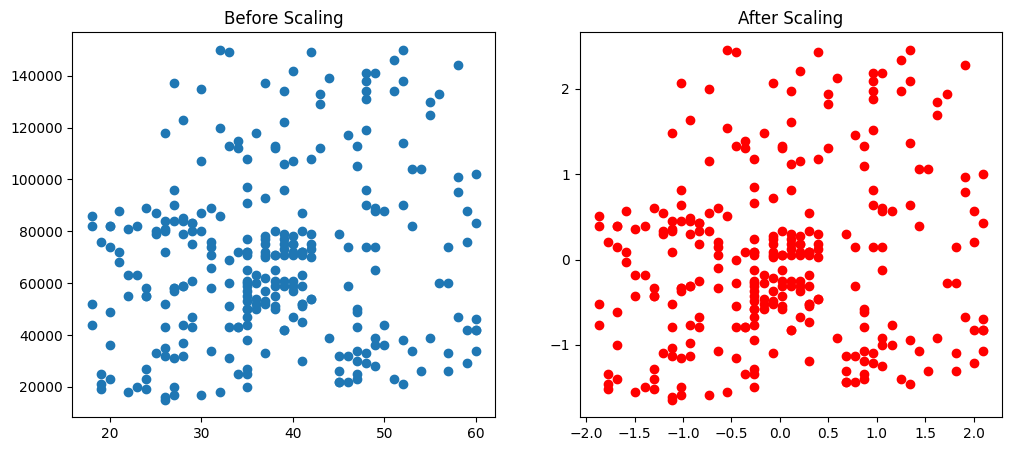

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

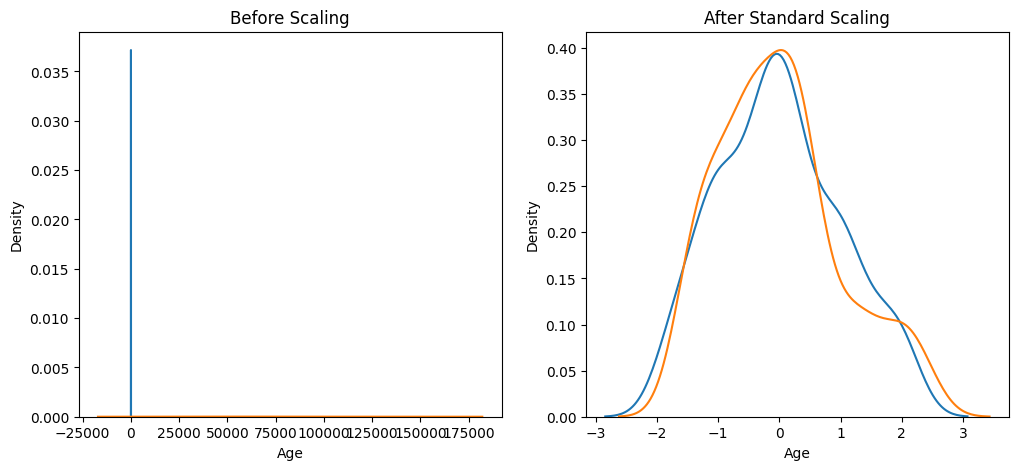

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

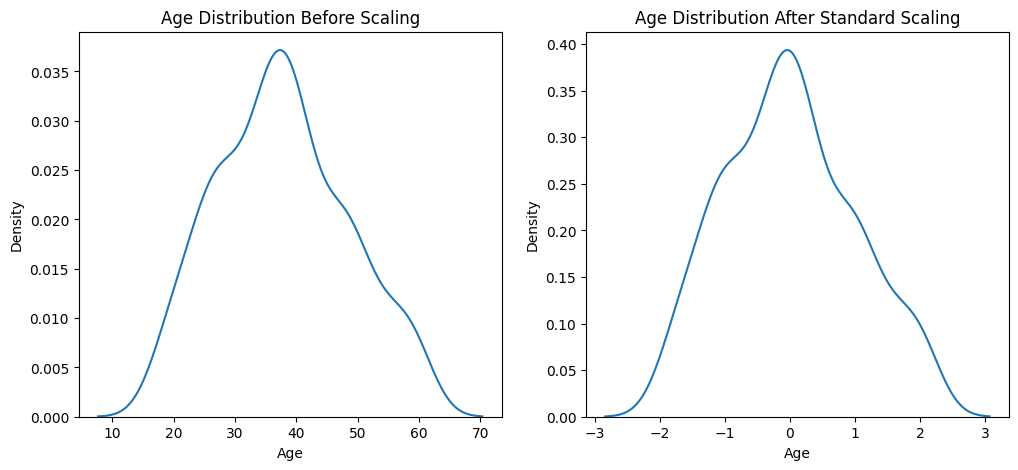

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

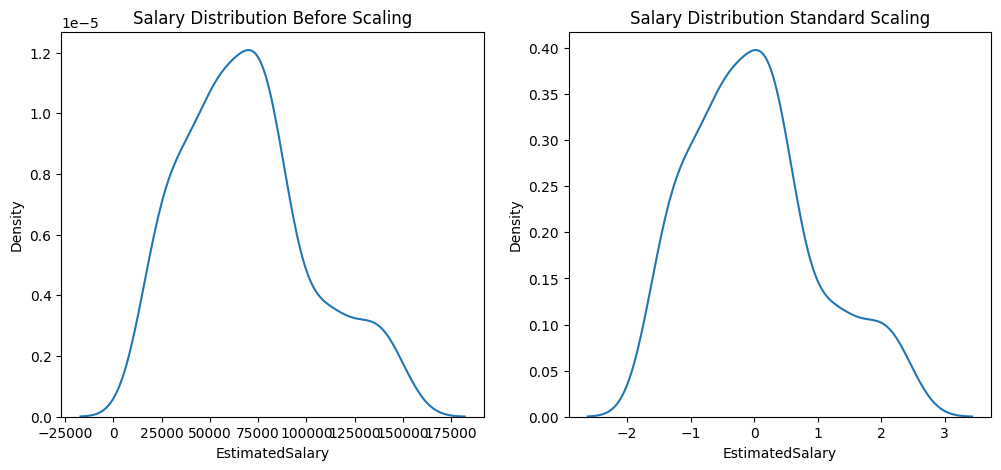

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [27]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6166666666666667
Scaled 0.8166666666666667


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [33]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [34]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [35]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8916666666666667
Scaled 0.8916666666666667


In [36]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
# only linear model requires scaling

# outlier will not change by sc